# pandasדרכים נוספות לטעון נתונים ל



In [ ]:
import pandas as pd

:טעינת קובץ גם מקישור מרוחק

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/flyandlure/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


 :מה שמאפשר לנו לקרוא אתרי אינטרנט HTMLקריאת דפי 

In [17]:
data = pd.read_html('https://en.wikipedia.org/wiki/Epyc', match="AMD EPYC CPU codenames")
data

[     Segment  Gen    Year       Name          Product line        Cores  \
 0     Server  1st  2017.0     Naples           7001 series      32× Zen   
 1     Server  2nd  2019.0       Rome           7002 series    64× Zen 2   
 2     Server  3rd  2021.0      Milan           7003 series    64× Zen 3   
 3     Server  3rd  2022.0    Milan-X           7003 series    64× Zen 3   
 4     Server  4th  2022.0      Genoa           9004 series    96× Zen 4   
 5     Server  4th  2023.0    Genoa-X           9004 series    96× Zen 4   
 6     Server  4th  2023.0    Bergamo           9004 series  128× Zen 4c   
 7     Server  4th  2023.0      Siena           8004 series   64× Zen 4c   
 8     Server  5th  2024.0      Turin                   TBA        Zen 5   
 9   Embedded  1st  2018.0  Snowy Owl  Embedded 3000 series      16× Zen   
 10  Embedded  2nd     NaN     Naples  Embedded 7001 series      32× Zen   
 11  Embedded  3rd     NaN       Rome  Embedded 7002 series    64× Zen 2   
 12  Embedde

 בודד DataFrame פונקציה זו מחזירה רשימה גם במקרה שמצאה רק  

In [22]:
data[0]

,Segment,Gen,Year,Name,Product line,Cores,Socket
0,Server,1st,2017.0,Naples,7001 series,32× Zen,SP3 (LGA)
1,Server,2nd,2019.0,Rome,7002 series,64× Zen 2,SP3 (LGA)
2,Server,3rd,2021.0,Milan,7003 series,64× Zen 3,SP3 (LGA)
3,Server,3rd,2022.0,Milan-X,7003 series,64× Zen 3,SP3 (LGA)
4,Server,4th,2022.0,Genoa,9004 series,96× Zen 4,SP5 (LGA)
5,Server,4th,2023.0,Genoa-X,9004 series,96× Zen 4,SP5 (LGA)
6,Server,4th,2023.0,Bergamo,9004 series,128× Zen 4c,SP5 (LGA)
7,Server,4th,2023.0,Siena,8004 series,64× Zen 4c,SP6 (LGA)
8,Server,5th,2024.0,Turin,TBA,Zen 5,TBA
9,Embedded,1st,2018.0,Snowy Owl,Embedded 3000 series,16× Zen,SP4 (BGA)


# DataFrameעבודה על נתונים ב

:יש אפשרות לקבל את הנתונים היחודיים בעמודה מסוימת

In [23]:
data[0].Year.unique()


array([2017., 2019., 2021., 2022., 2023., 2024., 2018.,   nan])

:לקבלת קורלציה על עמודה מסוימת

In [24]:
df.corr()['population'].sort_values()

C:\Users\הדסה אבימור\AppData\Local\Temp\ipykernel_7832\3264050773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['population'].sort_values()


housing_median_age   -0.296244
latitude             -0.108785
median_house_value   -0.024650
median_income         0.004834
longitude             0.099773
total_rooms           0.857126
total_bedrooms        0.877747
households            0.907222
population            1.000000
Name: population, dtype: float64

 מאפשרת לקבץ נתונים לפי ערכים ייחודיים בעמודות GroupBy


In [27]:
grouped_data = df.groupby('ocean_proximity')['total_bedrooms'].mean()
grouped_data

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

# Quandlשימוש ב

In [28]:
pip install Quandl

You should consider upgrading via the 'C:\Users\הדסה אבימור\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
import quandl 


In [30]:
api_key = "GnZNYYTvsZqhcWJVfbk9"
df = quandl.get('WIKI/AAPL', authtoken=api_key)
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [31]:
df['Close'].mean()

101.1944720212766

In [32]:
df['Close'].std()

135.08734966638826

# דוגמא מסכמת

In [37]:
# כתובת הדף בו נמצאים נתוני המדינות בוויקיפדיה
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states"

# קריאת נתוני הטבלה מהדף באמצעות פונקציה read_html של pandas
tables = pd.read_html(url)

# קריאת הטבלה המתאימה מהרשימה של הטבלאות
state_table = tables[0]


In [38]:
state_table

Flag, name and postal abbreviation [1]  \
   Flag, name and postal abbreviation [1]   
0                                 Alabama   
1                                  Alaska   
2                                 Arizona   
3                                Arkansas   
4                              California   
5                                Colorado   
6                             Connecticut   
7                                Delaware   
8                                 Florida   
9                                 Georgia   
10                                 Hawaii   
11                                  Idaho   
12                               Illinois   
13                                Indiana   
14                                   Iowa   
15                                 Kansas   
16                            Kentucky[B]   
17                              Louisiana   
18                                  Maine   
19                               Maryland   
20                       Massachusetts[B]   
21                               Michigan   
22                              Minnesota   
23                            Mississippi   
24                               Missouri   
25                                Montana   
26                               Nebraska   
27                                 Nevada   
28                          New Hampshire   
29                             New Jersey   
30                             New Mexico   
31                               New York   
32                         North Carolina   
33                           North Dakota   
34                                   Ohio   
35                               Oklahoma   
36                                 Oregon   
37                        Pennsylvania[B]   
38                           Rhode Island   
39                         South Carolina   
40                           South Dakota   
41                              Tennessee   
42                                  Texas   
43                                   Utah   
44                                Vermont   
45                            Virginia[B]   
46                             Washington   
47                          West Virginia   
48                              Wisconsin   
49                                Wyoming   

                                                     Cities  \
   Flag, name and postal abbreviation [1].1         Capital   
0                                        AL      Montgomery   
1                                        AK          Juneau   
2                                        AZ         Phoenix   
3                                        AR     Little Rock   
4                                        CA      Sacramento   
5                                        CO          Denver   
6                                        CT        Hartford   
7                                        DE           Dover   
8                                        FL     Tallahassee   
9                                        GA         Atlanta   
10                                       HI        Honolulu   
11                                       ID           Boise   
12                                       IL     Springfield   
13                                       IN    Indianapolis   
14                                       IA      Des Moines   
15                                       KS          Topeka   
16                                       KY       Frankfort   
17                                       LA     Baton Rouge   
18                                       ME         Augusta   
19                                       MD       Annapolis   
20                                       MA          Boston   
21                                       MI         Lansing   
22                                       MN      Saint Paul   
23                                       MS         Jackson   
24                      

In [41]:
# ניקוי הנתונים: הסרת שורות ריקות וכותרות נוספות בטבלה
state_table.dropna(inplace=True)
state_table = state_table.iloc[1:]


C:\Users\הדסה אבימור\AppData\Local\Temp\ipykernel_7832\2018628172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_table.dropna(inplace=True)


In [58]:
# יצירת DataFrame חדשה שמכילה רק את שמות המדינות ואת גודל האוכלוסיה שלהן
population_df = state_table[['Flag, name and postal abbreviation [1]', 'Population [3]', 'Total area[4]']]


In [59]:
population_df.head()

Flag, name and postal abbreviation [1]  \
  Flag, name and postal abbreviation [1]   
2                                Arizona   
3                               Arkansas   
4                             California   
5                               Colorado   
6                            Connecticut   

                                           Population [3] Total area[4]  \
  Flag, name and postal abbreviation [1].1 Population [3]           mi2   
2                                       AZ        7151502        113990   
3                                       AR        3011524         53179   
4                                       CA       39538223        163695   
5                                       CO        5773714        104094   
6                                       CT        3605944          5543   

           
      km2  
2  295234  
3  137732  
4  423967  
5  269601  
6   14357

In [64]:
# מיון המדינות לפי גודל האוכלוסיה ולקיחת רק עשרת המדינות הראשונות
top_10_populous = population_df.sort_values(by=('Population [3]', 'Population [3]'), ascending=False).head(10)
top_10_populous

Flag, name and postal abbreviation [1]  \
   Flag, name and postal abbreviation [1]   
4                              California   
42                                  Texas   
8                                 Florida   
31                               New York   
37                        Pennsylvania[B]   
12                               Illinois   
34                                   Ohio   
9                                 Georgia   
32                         North Carolina   
21                               Michigan   

                                            Population [3] Total area[4]  \
   Flag, name and postal abbreviation [1].1 Population [3]           mi2   
4                                        CA       39538223        163695   
42                                       TX       29145505        268596   
8                                        FL       21538187         65758   
31                                       NY       20201249         54555   
37                                       PA       13002700         46054   
12                                       IL       12812508         57914   
34                                       OH       11799448         44826   
9                                        GA       10711908         59425   
32                                       NC       10439388         53819   
21                                       MI       10077331         96714   

            
       km2  
4   423967  
42  695662  
8   170312  
31  141297  
37  119280  
12  149995  
34  116098  
9   153910  
32  139391  
21  250487

In [78]:
mean_population = state_table['Population [3]'].mean()
mean_population

Population [3]    6770876.375
dtype: float64

In [79]:
std_population = state_table['Population [3]'].std()
std_population

Population [3]    7.538871e+06
dtype: float64

array([[<AxesSubplot: title={'center': 'Population [3]'}>]], dtype=object)

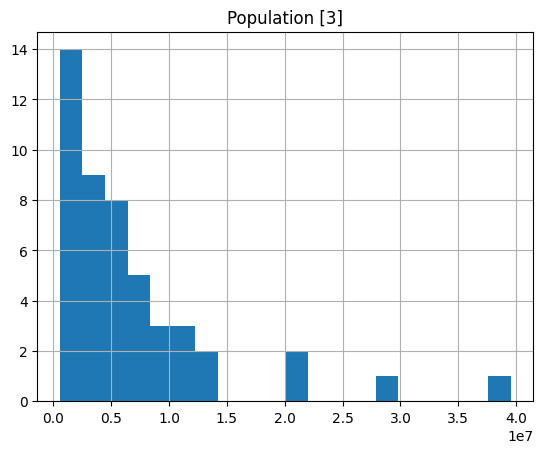

In [80]:
state_table['Population [3]'].hist(bins=20)
